In [16]:
import numpy as np 
from tqdm.notebook import tqdm
import os
from PIL import Image

In [17]:
def load_att_faces(dataset_path):
    """
    Загружает датасет AT&T Faces из указанного пути.

    Args:
        dataset_path (str): Путь к корневой папке датасета (например, 'data/att_faces/').

    Returns:
        tuple: Кортеж, содержащий два списка:
               - images: Список numpy массивов, представляющих изображения.
               - labels: Список целых чисел, представляющих метки (индексы людей).
    """
    images = []
    labels = []
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []
    person_id = 0
    for person_folder in tqdm(sorted(os.listdir(dataset_path)),'loading people images'):
        person_path = os.path.join(dataset_path, person_folder)
        if os.path.isdir(person_path):
            k = 0
            for image_file in sorted(os.listdir(person_path)):
                
                image_path = os.path.join(person_path, image_file)
                try:
                    k += 1
                    # Открываем изображение (предполагается формат PGM)
                    img = Image.open(image_path).convert('L')  # Конвертируем в оттенки серого
                    # Преобразуем изображение в numpy массив
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(person_id)
                    if k!=10:
                        train_images.append(img_array)
                        train_labels.append(person_id)
                    else:
                        test_images.append(img_array)
                        test_labels.append(person_id)
                except Exception as e:
                    print(f"Не удалось загрузить изображение: {image_path}. Ошибка: {e}")
            person_id += 1
            
    images, labels, train_images, train_labels, test_images, test_labels = np.array (images), np.array(labels), np.array(train_images), np.array(train_labels), np.array(test_images), np.array(test_labels)
    return images, labels, train_images, train_labels, test_images, test_labels

# Загружаем датасет
images, labels, train_images, train_labels, test_images, test_labels = load_att_faces('data/att_faces/')

loading people images:   0%|          | 0/41 [00:00<?, ?it/s]

In [18]:
# Теперь переменные att_faces_images и att_faces_labels содержат загруженные данные.
# Вы можете проверить их размер и содержимое.
print(f"Количество загруженных изображений: {len(images)}")
print(f"Количество меток: {len(labels)}")
print(f"Форма первого изображения: {images[0].shape}")
print(f"Метка первого изображения: {labels[0]}")

Количество загруженных изображений: 400
Количество меток: 400
Форма первого изображения: (112, 92)
Метка первого изображения: 0


In [19]:
F = []
test_images_ravel = []

for i in range(len(train_images)):
    F.append((train_images[i].flatten()))
    
for i in range(len(test_images)):
    test_images_ravel.append((test_images[i].flatten()))
        
F = np.array(F).T
test_images_ravel = np.array(test_images_ravel).T

F.shape

(10304, 360)

In [20]:
m = F.mean(axis=1)

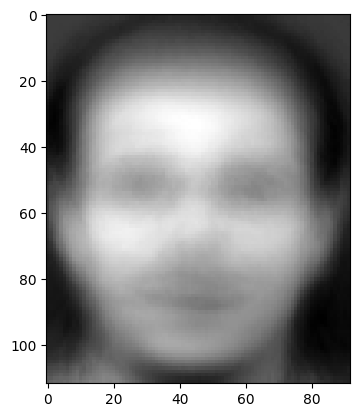

In [21]:
import matplotlib.pyplot as plt
plt.imshow(m.reshape((112, 92)),cmap='grey')
plt.show()

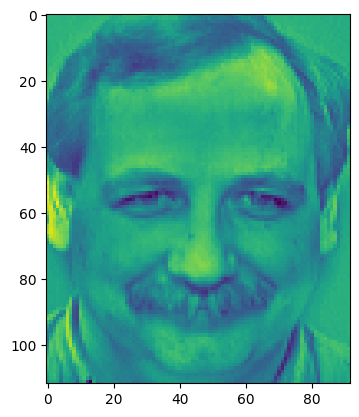

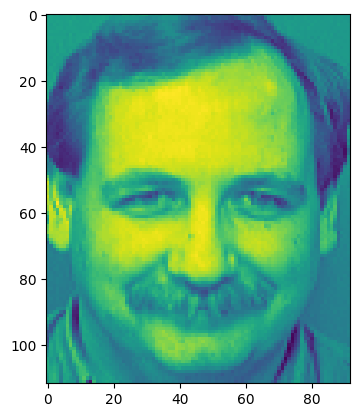

In [22]:
F_star = F - np.repeat(m,F.shape[1]).reshape(10304,360)
plt.imshow(F_star[:,156].reshape((112, 92)))
plt.show()
plt.imshow(F[:,156].reshape((112, 92)))
plt.show()

In [23]:
A = F_star.T @ F_star
A.shape

(360, 360)

In [ ]:
# Человек, что ты делаешь

2025-04-27 20:13:29,795 - INFO - Начало вычисления SVD (структурированный подход на Python с njit и NumPy).
2025-04-27 20:13:29,795 - INFO - Использование входного NumPy массива.
Процесс SVD:   0%|          | 0/7 [00:00<?, ?it/s]2025-04-27 20:13:29,795 - INFO - Шаг 1: Вычисление A = F*T * F*
2025-04-27 20:13:29,815 - INFO - Шаг 1 завершен.
2025-04-27 20:13:29,817 - INFO - Шаг 2: Приведение A к тридиагональной форме (Хаусхолдер)
2025-04-27 20:13:29,818 - INFO - Начало приведения матрицы к тридиагональной форме методом Хаусхолдера.
2025-04-27 20:13:30,442 - INFO - Приведение матрицы к тридиагональной форме завершено.
Процесс SVD:  29%|██▊       | 2/7 [00:00<00:01,  3.09it/s]2025-04-27 20:13:30,442 - INFO - Шаг 2 завершен.
2025-04-27 20:13:30,442 - INFO - Шаг 3: Нахождение собственных значений A (QR-алгоритм)
2025-04-27 20:13:30,442 - INFO - Начало QR-алгоритма для нахождения собственных значений (макс. итераций: 5000, допуск: 1e-12).
Процесс SVD:  29%|██▊       | 2/7 [04:35<11:28, 137.71

KeyboardInterrupt: 